# PAC4: LIMPIEZA DE DATOS



En esta PEC vamos a trabajar el proceso de  la limpieza de datos. En primer lugar, limpiaremos y filtraremos datos. En segundo lugar, realizaremos análisis exploratorio de los datos que nos permitirá continuar ocn la limpieza y pre- procesado de los datos. Dichos análisis los acompañaremos con visualizaciones. Por último, haremos una aproximacion a posibles problemas de regresion y clasificación. 

**Particularmente, en esta PAC, trabajaremos en 2 ejercicios que girarán en torno a conjuntos de datos relacionados con los menus del McDonals (Ejercicio 1) y con las ofertas de trabajo relacionadas con Ciencia de Datos (Ejercicio 2).**

**NOTA:** Se ha dejado una celda indicada para contestar las cuestiones y implementar el código solicitado, no obstante, si necesitaís más o preferís organizarlo de otra manera, podeis añadir las celdas que considereis convenientes. Asegurandoos siempre que contestais a las questiones planteadas.


In [1]:
# importar librerias
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
SMALL_SIZE = 8 +10
MEDIUM_SIZE = 10 +10
BIGGER_SIZE = 12 +10

plt.rc('font', size=SMALL_SIZE)   # controls default text sizes 
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title 
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels 
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels 
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels 
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize 
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

## Introducción

En esta PAC vamos a utilizar en gran medida la libreria Pandas de Python puesto que nos permite manipular los datos estructurados en dataframes. La librería numpy también nos va a servir de apoyo en algunas instrucciones. 

Como ya hemos podido comprobar en PACs anteriores, Pandas es una librería de python destinada al análisis de datos, que proporciona unas estructuras de datos flexibles y que permite trabajar con ellos de forma muy eficiente. Las estructuras de datos más utilizadas que ofrece pandas son:

- **Series**: Son arrays unidimensionales con indexación. Es decir, arrays con índice.
 
- **DataFrame**: Son estructuras de datos similares a las tablas de bases de datos relacionales como SQL.


_Ejemplo de serie y dataframe:_

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=[1,5,7,9,8,6,9,10,11]
index=[0,1,2,3,4,5,6,7,8]
serie = pd.Series(data, index=index)
serie.head(2)

0    1
1    5
dtype: int64

In [ ]:
df = pd.DataFrame(
    {
        'id': ['A1','A2','A3','A4','A4','A5','A6','A7','A8','A9','A10'],
        'nombre': ['Pedro', 'Juan', 'María', 'José', 'José', 'Alonso', 'Óscar', 'Javier', 'Irene', 'Sara', 'Andrea'],
        'edad': [10, 9, 15, 12, 12, 11, 14, 13, 14, 16, 17],
        'altura': [140, 135, 160, 128, 128, np.nan, 134, 142, 136,141,143],
        'peso':[56, 75, 80, 63, 60, 72, 82, 54, 82, 68, 56],
      'ciudad': ['Valencia', 'Alicante','Valencia','','','Barcelona','León','Segovia','Barcelona','Burgos','Madrid']
    })
df.head(2)

,id,nombre,edad,altura,peso,ciudad
0,A1,Pedro,10,140.0,56,Valencia
1,A2,Juan,9,135.0,75,Alicante


In [ ]:
# Conocer tipo de variables
df.dtypes

id         object
nombre     object
edad        int64
altura    float64
peso        int64
ciudad     object
dtype: object

In [ ]:
 #Para cambiar el tipo de datos que tiene asignado una columna, se puede hacer con la función df.astype()
 #Ejemplo
 df['peso'].astype(float) 

0     56.0
1     75.0
2     80.0
3     63.0
4     60.0
5     72.0
6     82.0
7     54.0
8     82.0
9     68.0
10    56.0
Name: peso, dtype: float64

Pandas permite cargar datos en formato csv mediante la funcion **pd.read\_csv** o **pd.read\_table**. De la misma forma, se puede guardar el dataframe en un csv con la función **df.to\_csv()**. Se recomienda que reviseis los argumentos que se le deben pasar a las funciones puesto que las vais a tener que utilizar en los ejercicios planteados.

Con el dataframe, se pueden realizar diferentes acciones muy útiles y relevantes desde el punto de vista de la limpieza de datos. Estas son:

- Eliminar valores duplicados (**df.drop_duplicates()**)
- Elimnar valores NA (**df.dropna()**)
- Reemplazar valores NA por un determinado valor (**df.fillna()**)
- Filtrar filas basándose en los valores de las mismas en las diferentes columnas. 

Además, se pueden agrupar datos por valores de una columna (**df.groupby()**), juntar diferentes dataframes indicando en base a qué columna (o columnas) se quiere unir (**df1.merge(df2)**), aplicar una funcion a los valores de una columna (**df.apply(funcion)**), o ordenar las filas del dataframe de acuerdo a los valores de una columna especificada de forma ascendente o descendente (**df.sort_values('nombre_columna')**).



_Ejemplos de la aplicación de las funciones mencionadas:_

In [ ]:
# Eliminar valores duplicados:
df_sin_duplicados= df.drop_duplicates()

#Eliminar filas cuyos valores de ciudad estén duplicados
df_sin_duplicados_ciudad= df.drop_duplicates(subset='ciudad')

#Eliminar valores NA
df_sin_na= df.dropna()

 #Reemplazar valores NA por zeros
df_na_remplazados=df.fillna(0)

# Filtrar personas de Valencia
df_valencia=df[df['ciudad']=='Valencia']

# Filtrar personas de valencia y qeu pesen más de 60 kg
df_valencia_peso_mayor_60= df[(df['ciudad']=='Valencia')& (df['peso']>60)]

#Agrupar datos por ciudad y obtener la media
df_media_por_ciudad= df.groupby('ciudad').mean()

# Crear una columna que sea el indice de masa corporal
df['IMC']= df['peso']/(df['altura']/100)

# Aplicar la función de saturación a la columna IMC (indice de masa corporal que sature en 18 por debajo y en 30 por arriba)

def saturacion_IMC (x):
  if x>30:
    return 30
  elif x<18:
    return 18
  else:
    return x

df['IMC_saturada']= df['IMC'].apply(saturacion_IMC)

# Juntar df con df2 por el valor de la ciudad

df2 = pd.DataFrame(
    {
      'ciudad': ['Valencia', 'Alicante','Barcelona','León','Segovia','Burgos','Madrid'], 
      'Comunidad_autonoma':['Comunidad Valenciana', 'Comunidad Valenciana','Catalunya','Castilla León','Castilla León','Castilla León','Madrid']
    })

df=df.merge(df2, left_on='ciudad', right_on='ciudad')

# Ordenar el dataframe de forma ascendente, de acuerdo a los valores de la edad
df=df.sort_values('edad')


Otras instrucciones que resultan interesantes, son las que nos permiten obtener métrics estadísticas como la media (**df.mean()**), la desviación estándar (**df.std()**), la mediana (**df.median()**), el maximo (**df.max()**), o el mínimo (**df.max()**) de los valores de las columnas numéricas. La función **df.describe()** devuelve un resumen de todas las metricas anteriores para las columnas numéricas.

In [ ]:
# Ejemplo obtención valores de métricas estadísticas

metricas_edad=[df['edad'].mean(), df['edad'].median(),df['edad'].std(), df['edad'].max(), df['edad'].min()]

print('Metricas estadísticas variable edad: ' , metricas_edad, '\n')
df.describe()

Metricas estadísticas variable edad:  [13.222222222222221, 14.0, 2.728450923957483, 17, 9] 



,edad,altura,peso,IMC,IMC_saturada
count,9.000000,8.000000,9.000000,8.000000,8.0
mean,13.222222,141.375000,69.444444,49.057458,30.0
std,2.728451,8.245128,11.544600,9.403556,0.0
min,9.000000,134.000000,54.000000,38.028169,30.0
25%,11.000000,135.750000,56.000000,39.790210,30.0
50%,14.000000,140.500000,72.000000,49.113475,30.0
75%,15.000000,142.250000,80.000000,56.740196,30.0
max,17.000000,160.000000,82.000000,61.194030,30.0


Cuando tenemos variable categóricas o discretas, la librería pandas nos permite obtener tablas de frecuencias para cada variable (**df['nombre_columna'].value_counts()**) o tablas de contingencia que relacionan unas variables categóricas con otras (**pd.crosstab(index=df['nombre_columna_1'],
            columns=df['nombre_columna_2'], margins=True)** ).

_Ejemplos:_

In [ ]:
#  tabla de frecuencia absoluta de la variable ciudad
df['ciudad'].value_counts()

Valencia     2
Barcelona    2
Madrid       1
León         1
Segovia      1
Burgos       1
Alicante     1
Name: ciudad, dtype: int64

In [ ]:
#  tabla de frecuencia absoluta de la variable ciudad
100 *df['ciudad'].value_counts() / len(df['ciudad'])

Valencia     22.222222
Barcelona    22.222222
Madrid       11.111111
León         11.111111
Segovia      11.111111
Burgos       11.111111
Alicante     11.111111
Name: ciudad, dtype: float64

In [ ]:
# Tabla de contingencia ciudad / edad
pd.crosstab(index=df['ciudad'],
            columns=df['edad'], margins=True)

edad,9,10,11,13,14,15,16,17,All
ciudad,,,,,,,,,
Alicante,1,0,0,0,0,0,0,0,1
Barcelona,0,0,1,0,1,0,0,0,2
Burgos,0,0,0,0,0,0,1,0,1
León,0,0,0,0,1,0,0,0,1
Madrid,0,0,0,0,0,0,0,1,1
Segovia,0,0,0,1,0,0,0,0,1
Valencia,0,1,0,0,0,1,0,0,2
All,1,1,1,1,2,1,1,1,9


In [ ]:
# Tabla de contingencia ciudad / edad en porcentajes relativos al total
pd.crosstab(index=df['ciudad'], columns=df['edad'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

edad,9,10,11,13,14,15,16,17,All
ciudad,,,,,,,,,
Alicante,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111
Barcelona,0.000000,0.000000,11.111111,0.000000,11.111111,0.000000,0.000000,0.000000,22.222222
Burgos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,11.111111
León,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111
Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,11.111111
Segovia,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,11.111111
Valencia,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,22.222222
All,11.111111,11.111111,11.111111,11.111111,22.222222,11.111111,11.111111,11.111111,100.000000


Para conocer la sintaxis de las funciones que se han presentado se recomienda que se consulte la documentación de pandas (https://pandas.pydata.org/docs/user_guide/index.html). 



---




Otra librería que resulta interesante en la limpieza de datos es la de expresiones regulares o regrex, **re**. 

Las _expresiones regulares_ son unas secuencias de caracteres que forman un patrón de búsqueda, las cuales son formalizadas por medio de una sintaxis específica. De esta forma, podemos:
- Limpiar valores de variables que contengan carácteres especiales como '/t', '/n', entre otros
- Eliminar espacios en blanco 
- Homogeneizar strings (eliminar acentos o carácteres especiales, transformar a mínusculas o mayusculas)
- Buscar y sustituir strings o partes de strings. 
- ...

_Ejemplos de la utilización de la librería re en los dataframes anteriores:_

In [ ]:
import re

In [ ]:
string1='Hola María, ¿Qué tal?'
new_string1 = re.sub('[^a-zA-Z0-9 \n\.]', '', string1)

In [ ]:
new_string1.replace(' ', '')

'HolaMaraQutal'

In [ ]:
# Eliminar caracteres con acentos y carácteres especiales a un strings
string1='Hola María, ¿Qué tal?'
new_string1 = re.sub('[^a-zA-Z0-9 \n\.]', '', string1)
print(string1)
print(new_string1)

# Eliminar carácteres con acentos y espacios en blanco de los valores de la columna nombre
df['nombre'].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x).replace(' ', ''))

# Homostring1='Hola María, ¿Qué tal?'
string2='Hola María, ¿Qué tal?'
new_string2 = string2.lower()
print('\n')
print(string2)
print(new_string2)

# Eliminar spacios en blanco a principio y a final
string3=' Hola María, ¿Qué tal? '
new_string3 = string3.strip()
print('\n')
print(string3)
print(new_string3)


# Separar cada palabra en elementos diferentes
string4=' Hola María, ¿Qué tal? '
new_string4 = string4.split()
print('\n')
print(string4)
print(new_string4)

# Sustituir los espacios en blanco por '-'
string5=' Hola María, ¿Qué tal? '
new_string5 = re.sub(' ', '-', string5)
print('\n')
print(string5)
print(new_string5)


Hola María, ¿Qué tal?
Hola Mara Qu tal


Hola María, ¿Qué tal?
hola maría, ¿qué tal?


 Hola María, ¿Qué tal? 
Hola María, ¿Qué tal?


 Hola María, ¿Qué tal? 
['Hola', 'María,', '¿Qué', 'tal?']


 Hola María, ¿Qué tal? 
-Hola-María,-¿Qué-tal?-


Una parte importante en el tratamiento y limpieza de datos es realizar un análisis exploratorio de los mismos. Como ya se ha introducido en la teoría,  esto se refiere tanto a la obtencion de las métricas e indicadores estadísticos más relevantes como a la identificación de las distribuciones que siguen los datos numéricos. Con esta finalidad, la librería  **scipy** permite realizar diferentes tests estadísticos como el de normalidad y homocedasticidad, entre otros. 

_Ejemplos de la realización de los test estadísticos más relevantes para la realización de esta PAC:_

In [ ]:
#Test de normalidad --> Test Shapiro - wilk (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
# Hipotesis nula (p-values> 0.05): datos normales
 
from scipy import stats
variable_1 = stats.norm.rvs(size=100) # genera 100 números aleatorios que siguen una distribución normal.
statistic, p_value = stats.shapiro(variable_1)
print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value)

Resultados Test Shapiro (stadístico, p-values):  0.9821480512619019 0.1947363168001175


In [ ]:
#Test de normalidad --> Test Kolmogorov-Smirnov (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest)

statistic, p_value = stats.kstest(variable_1, 'norm', alternative='less')
print('Resultados Test Kolmogorov-Smirnov (stadístico, p-values): ', statistic, p_value)


Resultados Test Kolmogorov-Smirnov (stadístico, p-values):  0.07057826870354283 0.3526735007701103


Ambos tests de normalidad ofrecen un p-value mayor que 0.5, aceptando por tanto la hipotesis nula de que la variable_1 sigue una distribución normal. 

In [ ]:
#Test de homocedasticidad  entre los grupos que se van a comparar o entre las variables que se van a analizar (si datos normales) --> Test  Levene (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html) 
# La hipótesis nula: las variables tienen varianzas similares. 

variable_1 = stats.norm.rvs(size=100)
variable_2 = stats.norm.rvs(size=100)
stat, p = stats.levene(variable_1,variable_2)
print('Resultados Test Levene (stadístico, p-values): ', stat, p)



Resultados Test Levene (stadístico, p-values):  0.6855462010260774 0.4086802861933244


De acuerdo con el resultado del test, la variable_1 y la variable_2 tienen varianzas similares. 



In [ ]:
#Test de homocedasticidad  entre los grupos que se van a comparar o entre las variables que se van a analizar (si datos no normales) --> Test   Fligner-Killeen (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html)
# La hipótesis nula: las variables tienen varianzas similares. 

import numpy as np
variable_1 = stats.norm.rvs(size=100)
variable_2 = np.linspace(-15, 15, num=100)
stat, p = stats.fligner(variable_1,variable_2)
print('Resultados Test Levene (stadístico, p-values): ', stat, p)



Resultados Test Levene (stadístico, p-values):  107.58543721229492 3.3131071738920236e-25


De acuerdo con el resultado del test, la variable_1 y la variable_2 NO tienen varianzas similares. 



In [ ]:
# Test comparación grupos (datos normales) -> t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
# Hipótesis nula: las dos muestras de dos grupos independientes tienen media identica. Por tanto, el factor grupo no tiene efecto. 

grupo_1 = stats.norm.rvs(size=100)
grupo_2 = stats.norm.rvs(size=100)
stat, p = stats.ttest_ind(grupo_1,grupo_2)
print('Resultados T-Test (stadístico, p-values): ', stat, p)



Resultados T-Test (stadístico, p-values):  -1.612568208993937 0.10843108576698351


In [ ]:
# Test comparación grupos (datos no normales) -> Test Kruskal Wallis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
# Hipótesis nula: las dos muestras de dos grupos independientes tienen mediana identica. Por tanto, el factor grupo no tiene efecto. 

import numpy as np
grupo_1 = stats.norm.rvs(size=100)
grupo_2 = np.linspace(-15, 15, num=100)
stat, p = stats.kruskal(grupo_1,grupo_2)
print('Resultados Test Kruskal Wallis (stadístico, p-values): ', stat, p)


Resultados Test Kruskal Wallis (stadístico, p-values):  0.003158208955255759 0.9551841187046418


En ambos ejemplos el p-value es mayor de 0.05, por tanto se interpreta que el factor grupo no tiene efecto. 

In [ ]:
# Test pareado comparación distribuciones (datos no normales) -> Test Kruskal Wallis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.scipy.stats.mannwhitneyu.html)
# Hipótesis nula: las dos muestras tienen distribuciones similares (p.tanto, se puede asumir medianas similares). 

import numpy as np
grupo_1 = stats.norm.rvs(size=100)
grupo_2 = np.linspace(-15, 15, num=100)

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(grupo_1,grupo_2)
print('Resultados del test Man Withney U (stadístico, p-values): ', stat, p)

Resultados del test Man Withney U (stadístico, p-values):  -37.5 0.452834019923814


El p-value es mayor de 0.05, por tanto se interpreta que pertenencen a distribuciones similares. 



---



Por último, una librería que nos permitirá poder realizar visualizaciones de los datos es **Matplotlib**. Con ella se puede, entre otras cosas: 

- representar los histogramas de los datos par ver cómo estan distribuidos. (**plt.hist()**)
- Obtener gráficas de barras (**plt.bar()**)
- Obtener graficas de linea (**plt.plot()**)
- Obtener gráficos de dispersión que relacionen dos variables numéricas (**plt.scatter()**)
- ...

En cada uno de los gráficos, se pueden modificar opciones de formato, de los ejes, y de la distribución de las figuras. 


Mencionar que también existe la librería **seaborn** (https://seaborn.pydata.org/) con prestaciones similares.


**Se recomienda que se explore la documentación de la librería para conocer con mayor detalle todo lo qeu nos ofrece.**

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html






_Ejemplos de gráficas que pueden obtenerse:_

In [ ]:
import matplotlib.pyplot as plt


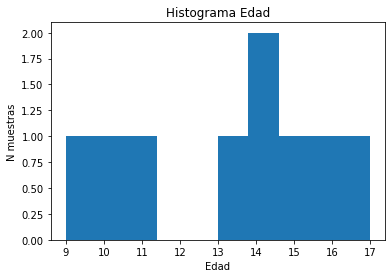

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


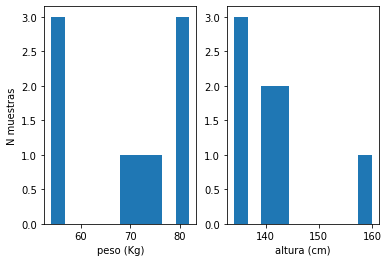

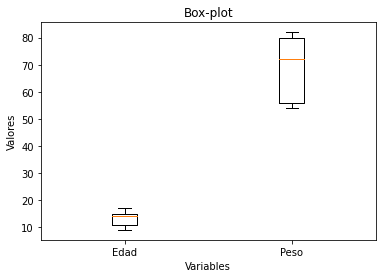

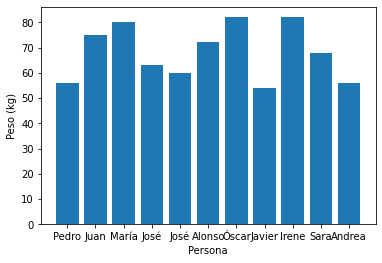

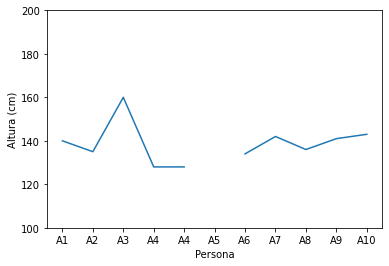

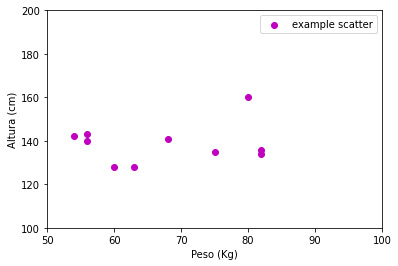

In [ ]:
# Obtener el histograma de la variable edad
plt.figure()
plt.title('Histograma Edad')
plt.hist(df['edad'].values)
plt.xlabel('Edad')
plt.ylabel ('N muestras')
plt.show()

# Obtener en una misma figura dos "subplots" donde en uno se represente la distribución de la variable peso y en la otra la de la variable altura
plt.figure()
plt.subplot(1,2,1)
plt.hist(df['peso'].values)
plt.xlabel('peso (Kg)')
plt.ylabel ('N muestras')
plt.subplot(1,2,2)
plt.hist(df['altura'].values)
plt.xlabel('altura (cm)')
plt.show()

# Obtener las gráficas box-plot que representan de la distribución de la variable 'Edad' y 'Peso' con lo
plt.figure()
plt.title('Box-plot')
plt.boxplot([df['edad'].values,df['peso'].values])
plt.xlabel('Variables')
plt.xticks([1,2],['Edad','Peso'])
plt.ylabel ('Valores')
plt.show()



# Obtener un gráfico de barras en que cada barra represente una persona (eje X) y la altura de la barra (eje Y) sea el peso 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.bar(x_values, df_sin_duplicados['peso'].values)
plt.xlabel('Persona')
plt.ylabel ('Peso (kg)')
plt.xticks(x_values, labels=df_sin_duplicados['nombre'].values)
plt.show()


# Obtener un gráfico de lineas donde cada valor en el eje X represente el identificador de la persona y el eje Y sea la altura. 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.plot(x_values, df_sin_duplicados['altura'].values)
plt.xlabel('Persona')
plt.ylabel ('Altura (cm)')
plt.xticks(x_values, labels=df_sin_duplicados['id'].values)
plt.ylim((100, 200))
plt.show()


# Obtener un gráfico de puntos que relacione el peso con la altura. 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.scatter( df_sin_duplicados['peso'].values, df_sin_duplicados['altura'].values, c='m', label= 'example scatter')
plt.xlabel('Peso (Kg)')
plt.ylabel ('Altura (cm)')
plt.ylim((100, 200))
plt.xlim((50, 100))
plt.legend()
plt.show()

## Ejercicio 1


En esta parte vamos a trabajar con un conjunto de datos relacionado con las características nutricionales de los menús del McDonals (**menu2_.csv**). Este dataset es una adaptación de los datos disponibles en el repositorio Kaggle. 

Adicionalmente, en el dataset **reviews.csv** aparece la información sobre las opiniones de los menus.

Con ambos datasets se pretende llevar a cabo el proceso de limpieza y la preparación de los datos, realizar un análisis estadístico, y finalmente obtener información/conocimiento de los datos.


###**Parte A:** Para realizar la **limpieza y preparación de los datos**, se solicita:

1.	**Con el dataset 'menu.csv'**





1.1.	Cargar el csv 'menu2_.csv'. ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# ## TODO
from google.colab import files
data= files.upload()

Saving menu2_.csv to menu2_.csv


In [ ]:
## TODO
data1= pd.read_csv('menu2_.csv')
data1.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17,3,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17,3,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17,2,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,21.0,6.0,0.0,25.0,10.0,NaN


In [ ]:
data1.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17,3,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17,3,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17,2,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,21.0,6.0,0.0,25.0,10.0,NaN



  1.2.	Indicar de qué tipo es cada variable y de qué tipo de dato toma Python a cada variable


_Respuesta:_

_TODO_

In [ ]:
## TODO
print(data1.dtypes)


Category                          object
Item                              object
Serving Size                      object
Calories                          object
Calories from Fat                float64
Total Fat                        float64
Total Fat (% Daily Value)        float64
Saturated Fat                    float64
Saturated Fat (% Daily Value)    float64
Trans Fat                        float64
Cholesterol                      float64
Cholesterol (% Daily Value)      float64
Sodium                           float64
Sodium (% Daily Value)           float64
Carbohydrates                    float64
Carbohydrates (% Daily Value)    float64
Dietary Fiber                    float64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                          float64
Vitamin A (% Daily Value)        float64
Vitamin C (% Daily Value)        float64
Calcium (% Daily Value)          float64
Iron (% Daily Value)             float64
Observ          

- ¿Hay algún campo que no está considerado correctamente? ¿A qué crees que pueda ser debido?

1.3. ¿Hay alguna instancia duplicada? En caso afirmativo, eliminar las instancias duplicadas para que solo haya filas únicas. 


In [ ]:
## TODO
print(data1.shape)
print(data1.drop_duplicates().shape)
print('Hay '+ str(data1.shape[0]-data1.drop_duplicates().shape[0])+' instancias duplicadas')
data1.drop_duplicates(inplace=True)

(266, 25)
(260, 25)
Hay 6 instancias duplicadas


1.4.	Limpieza de datos numéricos: Eliminar los símbolos o caracteres que imposibilitan que la variable sea tomada como int o float y sea considerada como un objeto o string. Este paso nos permitirá hacer operaciones y agrupaciones con los valores numéricos. En caso contrario no se podrá hacer ninguna operación matemática con las variables.


In [ ]:
## TODO
col_numericas= data1.columns[3:]

import re
for col in col_numericas:
  data1[col]= data1[col].apply(lambda x:  x if pd.isnull(x) else re.sub('[^0-9 ^\. ^\, ^-]', '', str(x))) 
  data1[col]= data1[col].astype(float)

data1.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17.0,3.0,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17.0,3.0,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17.0,2.0,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17.0,2.0,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17.0,2.0,21.0,6.0,0.0,25.0,10.0,NaN


- La variable 'Serving Size' es formato objeto ya que es de tipo cadena de texto. Para poder hacer cálculos sobre la variable que representa esta columna, vamos a quedarnos con el primer valor numérico que aparece y guardarlo en una nueva variable (columna) que se llame 'Serving Size oz'.

In [ ]:
data1['Serving Size oz.']=data1['Serving Size'].apply(lambda x: x.split(' ')[0])
data1['Serving Size oz.']=data1['Serving Size oz.'].astype(float)

1.5.	Limpieza de datos categóricos: 
  - Homogeneizar los valores de las variables categóricas que sean cadenas de texto de forma que estén todos en minúscula. Esto permitirá que se podrán cruzar diferentes bases de datos y que no se consideren cadenas distintas por aparecer en un caso en mayúsculas y en el otro en minúsculas. 

In [ ]:
## TODO
col_categoricas= data1.columns[:2]

def eliminar_accents(s):
    reemplazos = (
        ("á", "a"),
        ("à", "a"),
        ("é", "e"),
        ("è", "e"),
        ("í", "i"),
        ("ï", "i"),
        ("ó", "o"),
        ("ò", "o"),
        ("ú", "u"),
        ("ü", "u"),
    )

    for a, b in reemplazos:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

for col in col_categoricas:
  data1[col]=data1[col].apply(lambda x: x if pd.isnull(x) else (str(x)).lower())
  data1[col]=data1[col].apply(lambda x: x if pd.isnull(x) else eliminar_accents(str(x)))

1.6.	Detectar valores sin sentido y reemplazar por np.nan. Definiremos como valores sin sentido valores negativos de muertes por suicidio o valores numéricos de países. 

In [ ]:
for col in col_numericas:
  #print(col, np.sum(data_evolucion[col]<0))
  data1[col]= data1[col].apply(lambda x:  np.nan if x<0 else x)


1.7. Lidiar con los nan:

- Obtener un mapa de calor (heatmap) en el que se pueda visualizar facilmente los nan que exiten en el dataset. 
- Eliminar filas y columnas con todos los valores a NAN.
- Obtener el porcentaje de registros a NAN que tiene cada categoria. (NOTA: se recomienda evaluar la existencia de NAN en las variables, exceptuanto la variable Categoria. Después, agrupar por categoría y sumar el total de NAN).
- Obtener el porcentaje de NAN que tiene cada varaible.
- Eliminar las categorias y variables (columnas) que tengan más del 60% de nan
- En las variables que tengan menos de 10% de nan, imputar los valores con su mediana calculada con los datos disponibles de la variable (NOTA: se deberá recomputar el porcentaje de nan para cada fila después de haber eliminado las filas y columnas en los dos puntos anteriores).



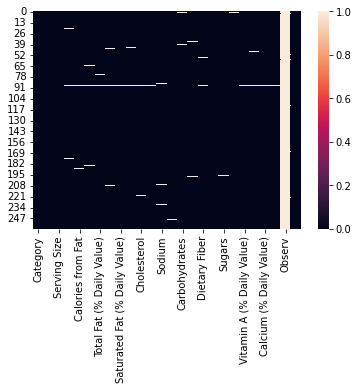

In [ ]:
import seaborn as sns
sns.heatmap(pd.isnull(data1))

In [ ]:
## TODO
cols_delete=[]

for col in data1.columns:
  if len(data1[col])==np.sum(pd.isnull(data1[col])):
    #print(col)
    cols_delete.append(col)

print(data1.shape)
data1.drop(columns=cols_delete, inplace=True)
print(data1.shape)

(260, 26)
(260, 25)


In [ ]:
row_delete=[]

for idx, v in zip(data1.index, data1.values):
  if len(v)==np.sum(pd.isnull(v)):
    print(idx)
    row_delete.append(idx)

print(data1.shape)
data1.drop(index=row_delete, inplace=True)
print(data1.shape)

(260, 25)
(260, 25)


In [ ]:
def calcular_per(x):
  return (np.sum(pd.isnull(x[2:]))/len(x[2:])*100)

data1['per_nan']= data1.apply(calcular_per, axis=1)
data1.sort_values(by='per_nan', ascending=False)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz.,per_nan
89,salads,premium southwest salad with grilled chicken,11.8 oz (335 g),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,15.0,15.0,NaN,NaN,NaN,NaN,11.8,60.869565
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,4.0,17.0,3.0,NaN,6.0,0.0,25.0,8.0,4.8,8.695652
184,coffee & tea,caramel mocha (small),12 fl oz cup,320.0,100.0,NaN,17.0,7.0,33.0,0.0,...,1.0,3.0,40.0,10.0,10.0,0.0,30.0,2.0,12,4.347826
40,breakfast,fruit & maple oatmeal,9.6 oz (251 g),290.0,35.0,4.0,6.0,1.5,8.0,0.0,...,5.0,19.0,32.0,5.0,2.0,130.0,10.0,10.0,9.6,4.347826
39,breakfast,cinnamon melts,4 oz (114 g),460.0,170.0,19.0,30.0,9.0,43.0,0.0,...,3.0,11.0,32.0,6.0,4.0,0.0,6.0,15.0,4,4.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,snacks & sides,kids french fries,1.3 oz (38 g),110.0,50.0,5.0,8.0,1.0,4.0,0.0,...,1.0,5.0,0.0,1.0,0.0,15.0,0.0,2.0,1.3,0.000000
100,snacks & sides,side salad,3.1 oz (87 g),20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,2.0,1.0,45.0,25.0,2.0,4.0,3.1,0.000000
101,snacks & sides,apple slices,1.2 oz (34 g),15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,160.0,2.0,0.0,1.2,0.000000
102,snacks & sides,fruit 'n yogurt parfait,5.2 oz (149 g),150.0,20.0,2.0,3.0,1.0,5.0,0.0,...,1.0,3.0,23.0,4.0,2.0,15.0,10.0,4.0,5.2,0.000000


In [ ]:
# Eliminar per_nan<=60
print(data1.shape)
data1=data1[data1['per_nan']<=60]
print(data1.shape)

(260, 26)
(259, 26)


In [ ]:
def calcular_per2(x):
  return (np.sum(pd.isnull(x))/len(x)*100)

col_delete2=data1.apply(calcular_per, axis=0)[(data1.apply(calcular_per2, axis=0)>60)].index.to_list()
print(data1.shape)
data1.drop(columns=col_delete2, inplace=True)
print(data1.shape)

(259, 26)
(259, 26)


In [ ]:
data1['per_nan']= data1.apply(calcular_per, axis=1)
data1.sort_values(by='per_nan', ascending=False)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz.,per_nan
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,4.0,17.0,3.0,NaN,6.0,0.0,25.0,8.0,4.8,8.333333
184,coffee & tea,caramel mocha (small),12 fl oz cup,320.0,100.0,NaN,17.0,7.0,33.0,0.0,...,1.0,3.0,40.0,10.0,10.0,0.0,30.0,2.0,12,4.166667
86,salads,premium bacon ranch salad with grilled chicken,8.5 oz (241 g),220.0,80.0,8.0,13.0,4.0,20.0,0.0,...,2.0,10.0,4.0,29.0,110.0,30.0,15.0,8.0,8.5,4.166667
40,breakfast,fruit & maple oatmeal,9.6 oz (251 g),290.0,35.0,4.0,6.0,1.5,8.0,0.0,...,5.0,19.0,32.0,5.0,2.0,130.0,10.0,10.0,9.6,4.166667
39,breakfast,cinnamon melts,4 oz (114 g),460.0,170.0,19.0,30.0,9.0,43.0,0.0,...,3.0,11.0,32.0,6.0,4.0,0.0,6.0,15.0,4,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,snacks & sides,kids french fries,1.3 oz (38 g),110.0,50.0,5.0,8.0,1.0,4.0,0.0,...,1.0,5.0,0.0,1.0,0.0,15.0,0.0,2.0,1.3,0.000000
100,snacks & sides,side salad,3.1 oz (87 g),20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,2.0,1.0,45.0,25.0,2.0,4.0,3.1,0.000000
101,snacks & sides,apple slices,1.2 oz (34 g),15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,160.0,2.0,0.0,1.2,0.000000
102,snacks & sides,fruit 'n yogurt parfait,5.2 oz (149 g),150.0,20.0,2.0,3.0,1.0,5.0,0.0,...,1.0,3.0,23.0,4.0,2.0,15.0,10.0,4.0,5.2,0.000000


In [ ]:
#En las variables que tengan menos de 10% de nan, imputar los valores con su mediana calculada con los datos disponibles de la variable
data1_gb= data1[[data1.columns[0]]+[x for x in data1.columns[3:].values]].groupby('Category').median()
for col in  data1.columns[3:]:
  indexs_to_fill=data1[(data1['per_nan']<10)&(data1['per_nan']>0)]['Category'].drop_duplicates().to_list()
  for ind in indexs_to_fill:
    for ind2 in data1[data1['Category']==ind].index.to_list():
      if  np.isnan(data1[col].loc[ind2]):
        data1[col].loc[ind2]= data1_gb[data1_gb.index==ind][col].values[0]



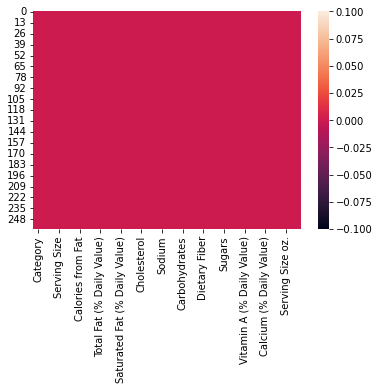

In [ ]:
#Nuevo mapa de calor con los nan eliminados

sns.heatmap(pd.isnull(data1))

**2. Con el dataset 'reviews.csv'**

2.1 Cargar datos "reviews.csv". ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# ## TODO
from google.colab import files
data= files.upload()

Saving reviews (2).csv to reviews (2).csv


In [ ]:
## TODO
data2= pd.read_csv('reviews (2).csv', sep='|')
data2.head()

,Category,Item,Reviews,Stars
0,breakfast,egg mcmuffin,575,5
1,breakfast,egg white delight,680,0
2,breakfast,sausage mcmuffin,398,5
3,breakfast,sausage mcmuffin with egg,766,2
4,breakfast,sausage mcmuffin with egg whites,6,5


2.2. Agregar al valor de Stars la palabra stars de forma que la variable 'Stars' se convierta en una variable categórica con valores atendiendo a la forma 'X stars'

In [ ]:
data2['Stars']=data2['Stars'].apply(lambda x: str(x)+' stars')

3.	**Unir dataframes resultantes en el punto 1 y 2”**

Juntar los dos dataframes de forma que a cada país le correspondan dos nuevas columnas “Reviews” y “Stars”. 


In [ ]:
## TODO
data_completo=data1.merge(data2, how='left', on=['Category','Item'])
data_completo


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz.,per_nan,Reviews,Stars
0,breakfast,egg mcmuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,...,3.0,17.0,10.0,0.0,25.0,15.0,4.8,0.000000,575.0,5 stars
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,3.0,19.0,6.0,0.0,25.0,8.0,4.8,8.333333,680.0,0 stars
2,breakfast,sausage mcmuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,...,2.0,14.0,8.0,0.0,25.0,10.0,3.9,0.000000,398.0,5 stars
3,breakfast,sausage mcmuffin with egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,...,2.0,21.0,15.0,0.0,30.0,15.0,5.7,0.000000,766.0,2 stars
4,breakfast,sausage mcmuffin with egg whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,...,2.0,21.0,6.0,0.0,25.0,10.0,5.7,0.000000,6.0,5 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,smoothies & shakes,mcflurry with oreo cookies (small),10.1 oz (285 g),510.0,150.0,17.0,26.0,9.0,44.0,0.5,...,64.0,12.0,15.0,0.0,40.0,8.0,10.1,0.000000,NaN,NaN
255,smoothies & shakes,mcflurry with oreo cookies (medium),13.4 oz (381 g),690.0,200.0,23.0,35.0,12.0,58.0,1.0,...,85.0,15.0,20.0,0.0,50.0,10.0,13.4,0.000000,NaN,NaN
256,smoothies & shakes,mcflurry with oreo cookies (snack),6.7 oz (190 g),340.0,100.0,11.0,17.0,6.0,29.0,0.0,...,43.0,8.0,10.0,0.0,25.0,6.0,6.7,0.000000,NaN,NaN
257,smoothies & shakes,mcflurry with reese's peanut butter cups (medium),14.2 oz (403 g),810.0,290.0,32.0,50.0,15.0,76.0,1.0,...,103.0,21.0,20.0,0.0,60.0,6.0,14.2,0.000000,NaN,NaN


- Eliminar columnas que representan los porcentajes de nan y 'Serving Size'

In [ ]:
#TODO
data_completo.drop(columns=['per_nan','Serving Size'], inplace=True)
data_completo.head()

### **Parte B.** **Análisis estadístico**:

1.	Obtener las principales métricas estadísticas (media, mediana, desviación estándar, percentil 25, percentil 75, moda, máximo, mínimo) de las variables numéricas.

In [ ]:
data_completo.columns

Index(['Category', 'Item', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size oz.',
       'Reviews', 'Stars'],
      dtype='object')

In [ ]:
## TODO
var_numericas=[ 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size oz.', 'Reviews']

data_completo[var_numericas].describe()



,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz.,Reviews
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,250.000000
mean,369.227799,127.393822,14.183398,21.855212,6.015444,30.030888,0.202703,54.961390,18.374517,494.594595,...,1.613900,6.447876,29.573359,13.289575,12.822394,8.463320,20.996139,7.706564,12.806950,532.932000
std,240.520234,128.015046,14.238083,21.923300,5.313227,26.669798,0.425031,87.417727,29.146560,577.898936,...,1.536872,6.175736,28.715600,11.418278,22.374874,26.360383,17.048835,8.728395,7.067862,283.605755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,210.000000,20.000000,2.250000,3.500000,1.000000,4.500000,0.000000,5.000000,2.000000,110.000000,...,0.000000,0.000000,5.500000,4.000000,2.000000,0.000000,6.000000,0.000000,6.750000,289.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,1.000000,5.000000,18.000000,12.000000,8.000000,0.000000,20.000000,4.000000,12.000000,582.500000
75%,500.000000,200.000000,22.500000,35.000000,10.000000,48.000000,0.000000,65.000000,21.000000,870.000000,...,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000,16.000000,772.250000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000,32.000000,993.000000


2. Representar distribución de las variables numéricas y realizar el test de normalidad a cada una de ellas para valorar si siguen una distribución normal.

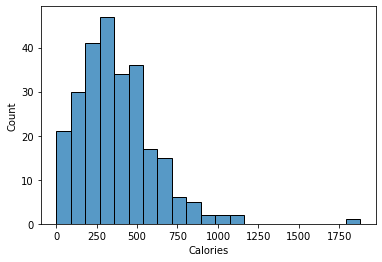

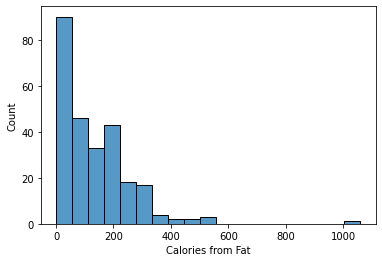

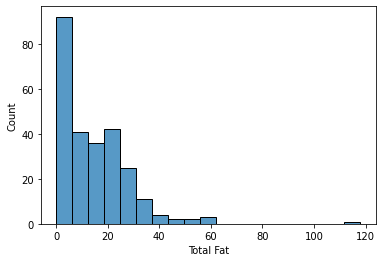

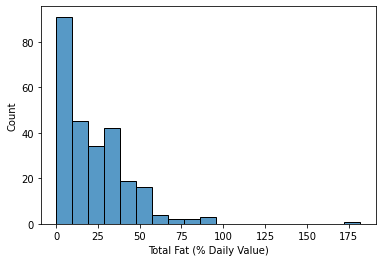

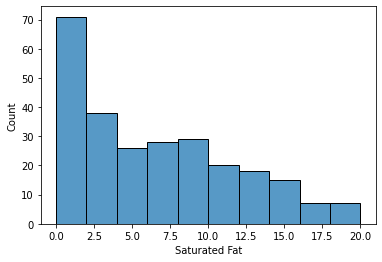

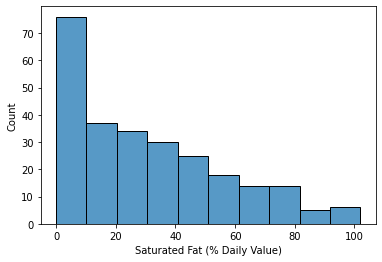

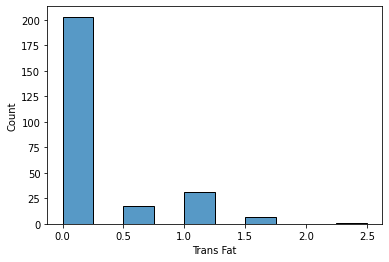

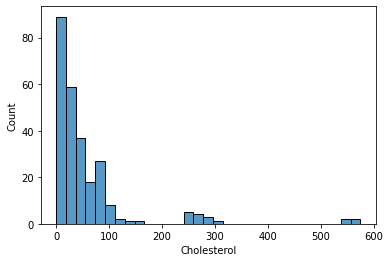

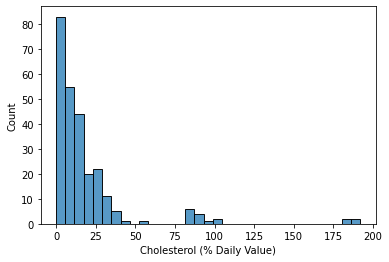

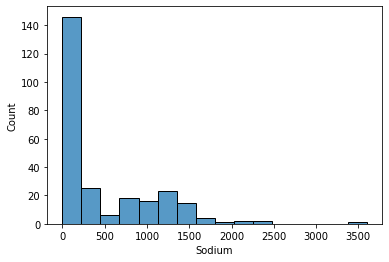

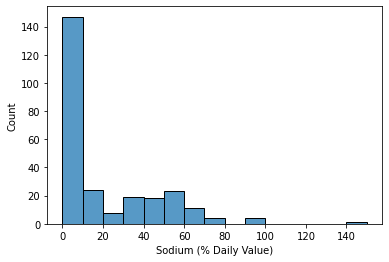

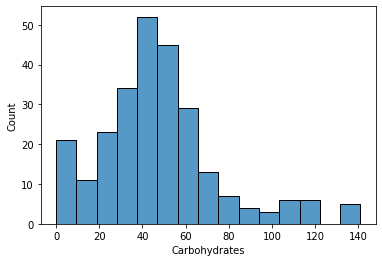

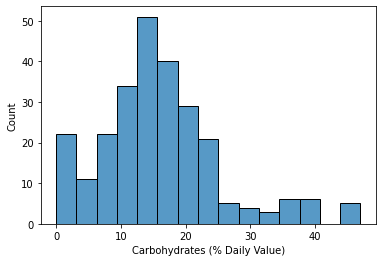

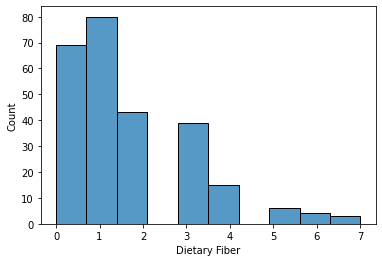

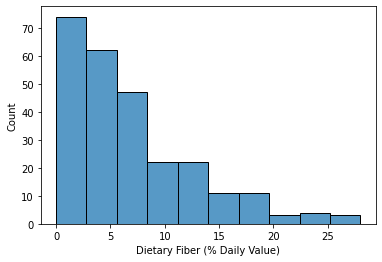

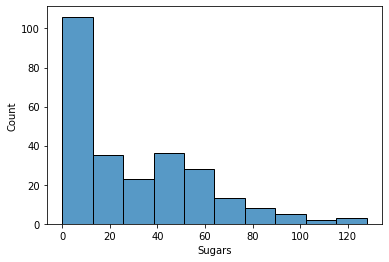

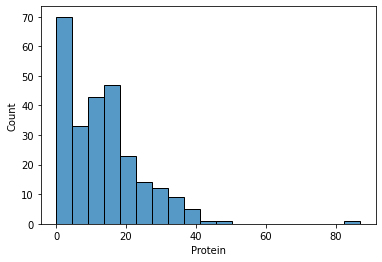

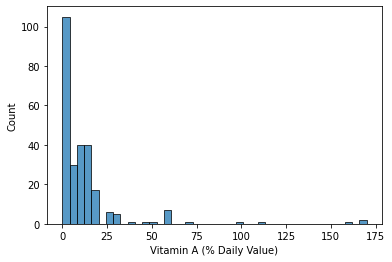

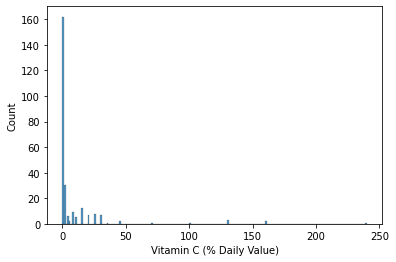

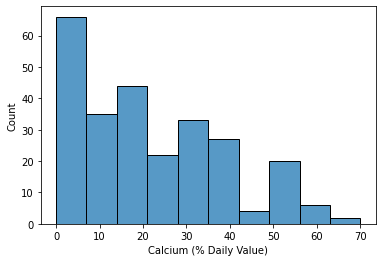

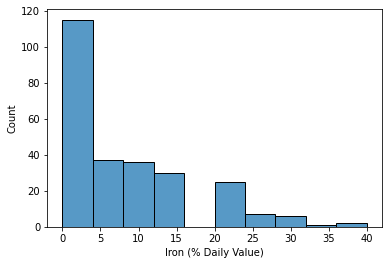

In [ ]:
# Representar distribución de las variables numéricas
import matplotlib.pyplot as plt

for col in col_numericas[:-1]:
  sns.histplot(x=col, data=data_completo)
  plt.show()


In [ ]:
# Test de normalidad de las variables numéricas
## TODO
from scipy import stats
for var in var_numericas:
  statistic, p_value = stats.kstest(data_completo[var].dropna().values, 'norm', alternative='less')
  #statistic, p_value = stats.shapiro(df_moviles[col].values)
  print('Test Kolmogorov-Smirnov  per a variable ', var ,': p-values= ', p_value , '----> '+ 'La variable suicidios en 2019'+ ' es normal: ', p_value>0.05)



Test Kolmogorov-Smirnov  per a variable  Calories : p-values=  6.6456409087e-314 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Calories from Fat : p-values=  3.685268403908668e-174 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Total Fat : p-values=  5.787480383152058e-149 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Total Fat (% Daily Value) : p-values=  2.695840594415258e-152 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Saturated Fat : p-values=  2.1433632073825994e-129 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Saturated Fat (% Daily Value) : p-values=  2.2201395791903903e-160 ----> La variable suicidios en 2019 es normal:  False
Test Kolmogorov-Smirnov  per a variable  Trans Fat : p-values=  1.0620077833863138e-60 ----> La variable suici

3. La distribución de calorias es estadísticamente distinta en las 'Salads' y los 'Desserts'? Y la distribución del azucar? Representar en cada caso (calorías y azúcar) las distribuciones para Salads y Desserts en una misma gráfica para observar mejor las discrepacias (o no).

NOTA: La selección del test dependerá de si las distribuciones son normales o no (resultados del apartado anterior).

In [ ]:
# La distribución de calorias son estadísticamente distintas en las 'Salads' y los 'Desserts'? Y el azucar?

#MODIFICAR

evo_esp= data_completo[data_completo['Category']=='salads']['Calories'].dropna().values
evo_fin= data_completo[data_completo['Category']=='desserts']['Calories'].dropna().values

stat, p = stats.mannwhitneyu(evo_esp,evo_fin)
print('Diferencia entre Calories y Sugars: ', p<=0.5)


Diferencia entre Calories y Sugars:  False


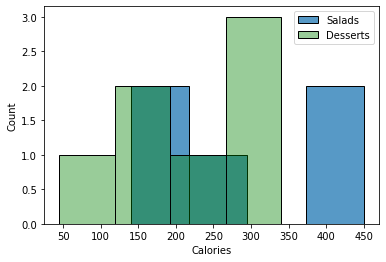

In [ ]:
#Representar ambas distribuciones en un mismo gráfico para poder comparar gráficamente también
sns.histplot(x='Calories', data=data_completo[data_completo['Category']=='salads'], label='Salads')
sns.histplot(x='Calories', data=data_completo[data_completo['Category']=='desserts'], color='g', alpha=0.4, label='Desserts')
plt.legend()
plt.show()



In [ ]:
# La distribución de calorias son estadísticamente distintas en las 'Salads' y los 'Desserts'? Y el azucar?

#MODIFICAR
evo_esp= data_completo[data_completo['Category']=='salads']['Sugars'].dropna().values
evo_fin= data_completo[data_completo['Category']=='desserts']['Sugars'].dropna().values

stat, p = stats.mannwhitneyu(evo_esp,evo_fin)
print('Diferencia entre Calories y Sugars: ', p<=0.5)


Diferencia entre Calories y Sugars:  True


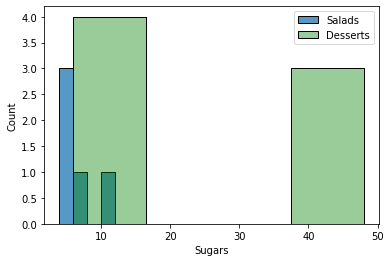

In [ ]:
#Representar ambas distribuciones en un mismo gráfico para poder comparar gráficamente también
sns.histplot(x='Sugars', data=data_completo[data_completo['Category']=='salads'], label='Salads')
sns.histplot(x='Sugars', data=data_completo[data_completo['Category']=='desserts'], color='g', alpha=0.4, label='Desserts')
plt.legend()
plt.show()


4. Discretizar la variable calorias en 4 valores mediante el método de los cuartíles. 

In [ ]:
#Discritizar la variable calorias en 4 considerando el método de los cuartiles
data_completo['Calories_cat']= pd.qcut(data_completo['Calories'], 4, labels=["very Low", "Low", "medium", "High"])


5. Obtener las tablas de frecuencia de las variables categóricas (incluida la creada en el apartado anterior (calories_cat).

In [ ]:
## TODO
var_categoricas=[ 'Category', 'Item', 'Stars', 'Calories_cat']

for var in var_categoricas:
  print(data_completo[var].value_counts())



coffee & tea          95
breakfast             42
smoothies & shakes    28
chicken & fish        27
beverages             27
beef & pork           15
snacks & sides        13
desserts               7
salads                 5
Name: Category, dtype: int64
egg mcmuffin                                        1
hot chocolate with nonfat milk (large)              1
nonfat latte (large)                                1
nonfat caramel latte (small)                        1
nonfat caramel latte (medium)                       1
                                                   ..
honey mustard snack wrap (crispy chicken)           1
honey mustard snack wrap (grilled chicken)          1
ranch snack wrap (crispy chicken)                   1
ranch snack wrap (grilled chicken)                  1
mcflurry with reese's peanut butter cups (snack)    1
Name: Item, Length: 259, dtype: int64
5 stars    50
3 stars    50
0 stars    45
2 stars    38
4 stars    37
1 stars    30
Name: Stars, dtype: int64
Low 

6. Obtener el diagrama de frecuencias de las variables categóricas (incluida la variable discretizada).

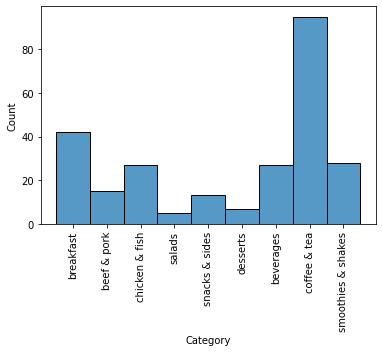

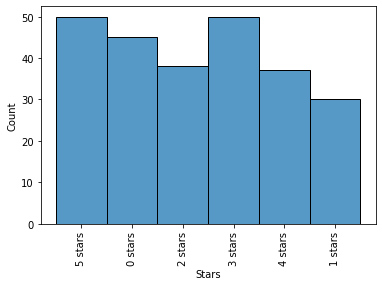

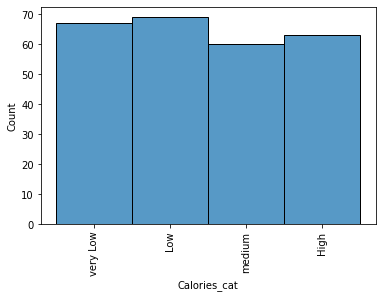

In [ ]:
#diagrama de frecuencias de las variables categóricas (incluida la variable discretizada)
for cat in [ 'Category', 'Stars', 'Calories_cat']:
  sns.histplot(x=cat, data=data_completo)
  plt.xticks(rotation=90)
  plt.show()

7. Obtener la tabla de contingencia entre 'Category' y la variable discretizada de las calorias. 

In [ ]:
#Tabla de contingencia 'Categories' y discretización 'Calories'.

pd.crosstab(data_completo['Category'], 
                            data_completo['Calories_cat'],  
                               margins = True) 

Calories_cat,very Low,Low,medium,High,All
Category,,,,,
beef & pork,0,2,6,7,15
beverages,23,4,0,0,27
breakfast,1,5,18,18,42
chicken & fish,1,1,12,13,27
coffee & tea,31,37,19,8,95
desserts,3,4,0,0,7
salads,2,1,2,0,5
smoothies & shakes,2,8,2,16,28
snacks & sides,4,7,1,1,13


8. La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?



NOTA: La selección del test dependerá de si las distribuciones son normales o no.

In [ ]:
# La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?

grupo_1 = data_completo[data_completo['Category']=='beef & pork']['Sugars'].values
grupo_2 = data_completo[data_completo['Category']=='chicken & fish']['Sugars'].values

stat, p = stats.kruskal(grupo_1,grupo_2,)
print('Factor Region afecta: ', p<=0.5)



Factor Region afecta:  True


9. La diferencia de calorías entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?

In [ ]:
# La diferencia de calorias entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?
grupo_1 = data_completo[data_completo['Category']=='beef & pork']['Calories'].values
grupo_2 = data_completo[data_completo['Category']=='chicken & fish']['Calories'].values

stat, p = stats.kruskal(grupo_1,grupo_2,)
print('Factor Region afecta: ', p<=0.5)



Factor Region afecta:  False


10. El factor categoría afecta en el valor de las calorias? Aplicar el test correspondiente. Después obtener el gráfico box-plot en el que se adviertan como se distribuyen los valores de calorías por category. 

In [ ]:
## TODO (El factor categoría afecta en el valor de las calorias. Y al azucar?)

grupo_1 = data_completo[data_completo['Category']=='beef & pork']['Calories'].values
grupo_2 = data_completo[data_completo['Category']=='chicken & fish']['Calories'].values
grupo_3 = data_completo[data_completo['Category']=='breakfast']['Calories'].values
grupo_4 = data_completo[data_completo['Category']=='salads']['Calories'].values
grupo_5 = data_completo[data_completo['Category']=='snacks & sides']['Calories'].values
grupo_6 = data_completo[data_completo['Category']=='desserts']['Calories'].values
grupo_7 = data_completo[data_completo['Category']=='beverages']['Calories'].values
grupo_8 = data_completo[data_completo['Category']=='coffee & tea']['Calories'].values
grupo_9 = data_completo[data_completo['Category']=='smoothies & shakes']['Calories'].values

stat, p = stats.kruskal(grupo_1,grupo_2,grupo_3,grupo_4,grupo_5,grupo_6,grupo_7,grupo_8,grupo_9)
print('Factor Region afecta: ', p<=0.5)


Factor Region afecta:  True


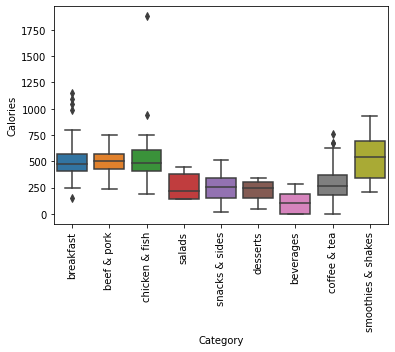

In [ ]:
sns.boxplot(x='Category', y='Calories', data=data_completo)
plt.xticks(rotation=90)
plt.show()

###**Parte C.** Obtener **información y visualizaciones:**

1.	¿Cuantas calorias supone comer la opción con menos calorias de la categoría 'Salad' y de la categoría 'Desserts'? De qué items estaríamos hablando?

In [ ]:
data_completo[data_completo['Category']=='desserts']['Calories'].min()

45.0

In [ ]:
min_calories_salad= data_completo[data_completo['Category']=='salads']['Calories'].min()
min_calories_desserts= data_completo[data_completo['Category']=='desserts']['Calories'].min()

print('Estaríamos consumiendo las siguientes calorias: ', min_calories_salad+min_calories_desserts)
print('Estaríamos comiendo una de estas opciones para la ensalada: ', data_completo[(data_completo['Category']=='salads')& (data_completo['Calories']==min_calories_salad)]['Item'].values)
print('Estaríamos comiendo una de estas opciones para los postres: ', data_completo[(data_completo['Category']=='desserts')& (data_completo['Calories']==min_calories_desserts)]['Item'].values)


Estaríamos consumiendo las siguientes calorias:  185.0
Estaríamos comiendo una de estas opciones para la ensalada:  ['premium bacon ranch salad (without chicken)'
 'premium southwest salad (without chicken)']
Estaríamos comiendo una de estas opciones para los postres:  ['kids ice cream cone']


2. Cuáles son los 10 ítems con más azucar? Representa en un diagrama de barras la cantidad de azucar de estos 10 items, ordenadas de mayor a menor.

In [ ]:
data_completo.sort_values(by=['Sugars'], ascending=False)['Item'].head(10).to_list()

['mcflurry with m&m’s candies (medium)',
 'strawberry shake (large)',
 'chocolate shake (large)',
 'shamrock shake (large)',
 "mcflurry with reese's peanut butter cups (medium)",
 'vanilla shake (large)',
 'strawberry shake (medium)',
 'frappe chocolate chip (large)',
 'chocolate shake (medium)',
 'shamrock shake (medium)']

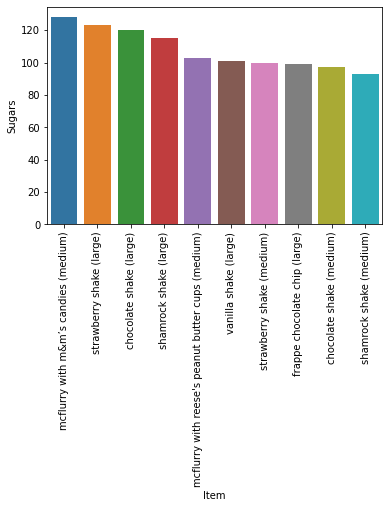

In [ ]:
sns.barplot(x='Item', y='Sugars', data=data_completo.sort_values(by=['Sugars'], ascending=False).head(10))
plt.xticks(rotation=90)
plt.show()

3. Que categoría presenta en media más estrellas (stars)? Representa en un mismo gráfico: 1) diagrama de barras del número medio de reviews por categoria; 2) plot lineas con el número médio de estrellas. Se solicita que se use un gráfico de dos ejes, uno para cada variable indicada.
NOTA: Previamente a la visualización, se deberá convertir en variable numérica las 'Stars', eliminando el texto.

NOTA: Ayuda para le plot: https://www.analyticslane.com/2022/08/04/uso-de-multiples-ejes-en-matplotlib/


In [ ]:
data_completo['Stars']=data_completo['Stars'].apply(lambda x: str(x).split(' ')[0])
data_completo['Stars']=data_completo['Stars'].astype(float)

In [ ]:
data_completo_gby=data_completo[['Category', 'Stars', 'Reviews']].groupby('Category').mean().reset_index()

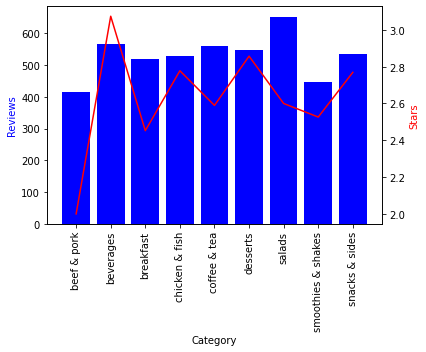

In [ ]:
fig, axes = plt.subplots()
axes.bar(data_completo_gby['Category'].to_list(), data_completo_gby['Reviews'].to_list(), color='b')
axes.set_xlabel('Category')
plt.xticks(rotation=90)
axes.set_ylabel('Reviews', color='b')
twin_axes = axes.twinx() 
twin_axes.plot(data_completo_gby['Category'].to_list(), data_completo_gby['Stars'].to_list(), 'r')
twin_axes.set_ylabel('Stars', color='r')
plt.xticks(rotation=90)
plt.show()

4. Crea un dataframe que muestre para cada categoria una columna con el ítem con más proteina y el ítem con menos proteina. Este dataframe tendrà tres columnas: [Categoría, item_max_prot, item_min_prot]

In [ ]:
min_prot=[]
max_prot=[]
cats=[]
for category in data_completo['Category'].drop_duplicates():
  df_aux=data_completo[(data_completo['Category']==category)]['Protein']
  #data_completo[(data_completo['Category']==category)&(data_completo['Protein']==df_aux.min())]['Item'].values[0]
  min_prot.append(data_completo[(data_completo['Category']==category)&(data_completo['Protein']==df_aux.min())]['Item'].values[0])
  max_prot.append(data_completo[(data_completo['Category']==category)&(data_completo['Protein']==df_aux.max())]['Item'].values[0])
  cats.append(category)


In [ ]:
df_protein=pd.DataFrame()
df_protein['Category']=cats
df_protein['item_max_prot']=max_prot
df_protein['item_min_prot']=min_prot
df_protein

,Category,item_max_prot,item_min_prot
0,breakfast,big breakfast with hotcakes (regular biscuit),hash brown
1,beef & pork,double quarter pounder with cheese,hamburger
2,chicken & fish,chicken mcnuggets (40 piece),chicken mcnuggets (4 piece)
3,salads,premium bacon ranch salad with grilled chicken,premium southwest salad (without chicken)
4,snacks & sides,chipotle bbq snack wrap (grilled chicken),apple slices
5,desserts,hot fudge sundae,kids ice cream cone
6,beverages,fat free chocolate milk jug,coca-cola classic (small)
7,coffee & tea,hot chocolate with nonfat milk (large),iced tea (small)
8,smoothies & shakes,mcflurry with reese's peanut butter cups (medium),blueberry pomegranate smoothie (small)


5. Crea un grafico tipo scatterplot para representar la relación entre sugar vs Carbohidrates. Adviertes alguna tendencia? Cómo interpretas el gráfico.
Repite el mismo gráfico pero diferenciando por colores los valores correspondientes a cada categoria. Cómo interpretas el gráfico?
 

In [ ]:
data_completo.columns

Index(['Category', 'Item', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size oz.',
       'Reviews', 'Stars', 'Calories_cat'],
      dtype='object')

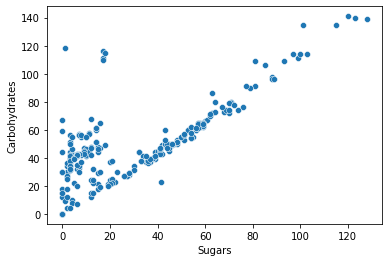

In [ ]:
sns.scatterplot(x='Sugars', y= 'Carbohydrates', data= data_completo)

_Interpretación:_

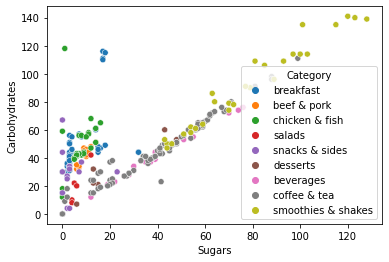

In [ ]:
sns.scatterplot(x='Sugars', y= 'Carbohydrates', data= data_completo, hue='Category')

6. Repite el mismo gráfico que en el punto anterior pero para las variables Serving Size oz y calorias. Adviertes alguna relación? Cómo interpretas los gráficos. 

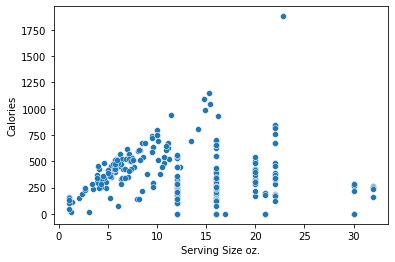

In [ ]:
sns.scatterplot(x='Serving Size oz.', y= 'Calories', data= data_completo)

_Interpretación:_

## Ejercicio 2


En esta parte vamos a trabajar con datos registrado de un portal de empleo para las ofertas relacionadas con Ciencia de Datos. Es una adaptación del dataset disponible en Kaggle. .


Con este dataset, además de limpiar y preparar los datos, plantearemos qué tipo de problema (regresión o clasificación) podríamos resolver con este dataset preparado. 


### **Parte A.** Para realizar la **limpieza y preparación de los datos**, se solicita:

1.	Cargar el fichero 'Naukri Jobs Data.csv'


In [ ]:
# subir todos los archivos de la PEC a colab
from google.colab import files
data= files.upload()

Saving Naukri Jobs Data.csv to Naukri Jobs Data (1).csv


In [ ]:
import pandas as pd
data=pd.read_csv('Naukri Jobs Data.csv')

In [ ]:
data.head()

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022
0,Information Technology Executive,Marriott,4.2,(2907 Reviews),0-3 Yrs,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO
1,Associate Director-Information Technology(SAP),Unacademy,3.4,(544 Reviews),5-15 Yrs,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO
2,Lead - Information Technology,EchoIndia,4.0,(20 Reviews),11-13 Yrs,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO
3,Information Technology - Project Manager,Tata International,4.1,(287 Reviews),4-8 Yrs,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO
4,Information Technology Trainee,Stefanini,3.8,(75 Reviews),2-7 Yrs,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO


2. Tratamiento de los nans:
- Obtener el mapa de color para valorar visualmente donde tenemos nansMapa de calor
- Eliminar todas las filas que tengan almenos una variable a nan. Volver a obtener el mapa de calor para ombservar si en efecto se han eliminado todos los nans.

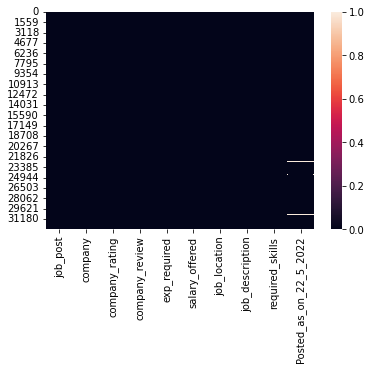

In [ ]:
sns.heatmap(pd.isnull(data))

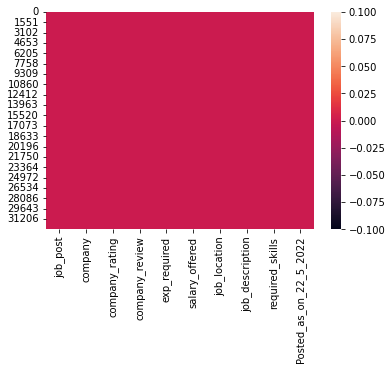

In [ ]:
data.dropna(inplace=True)
sns.heatmap(pd.isnull(data))

3. Qué tipos de datos interpreta Python para cada variable?

In [ ]:
#Tipus de dades
data.dtypes

job_post                   object
company                    object
company_rating            float64
company_review             object
exp_required               object
salary_offered             object
job_location               object
job_description            object
required_skills            object
Posted_as_on_22_5_2022     object
dtype: object

4. Transformar la columna 'company_review' para que se quede solamente los números y se puedan hacer los cálculos pertinentes.

In [ ]:
# Transformació columna company_review (quedarse solamente con el número para que puedan hacerse cálculos)
data['company_review']=data['company_review'].apply(lambda x:  x if pd.isnull(x) else re.sub('[^0-9 ^\. ^\, ^-]', '', str(x))) 


5. Discretizacion de la variable 'company_rating'. En este caso, redondear al valor entero.

In [ ]:
#Discretizar la variable 'company_rating' al valor entero.

data['company_rating_class']=data['company_rating'].astype(int)

6. Obtener una variable que haga referencia a la fecha ('timestamp') que se calcule a partir de los valores de la columna 'Posted_as_on_22_5_2022'. Si os fijais en esta columna aparece los dias que hace de la oferta. Para hacer la transformación deberéis:
- Eliminar el texto de la variable 'Posted_as_on_22_5_2022'
- Timestamp será igual a el dia en que estáis haciendo la PAC (datatime.today()) menos el valor de la variable 'Posted_as_on_22_5_2022'.


In [ ]:
import datetime

In [ ]:
data['timestamp']= data['Posted_as_on_22_5_2022'].apply(lambda x: datetime.date.today()-
                                                        datetime.timedelta(days=int((str(x).split(' ')[0]).replace('nan','0').replace('TODAY','0').replace('+',''))))

7. Representar la evolución temporal del número total de ofertas publicadas por día. Repetir la evolución pero diferenciando en líneas de colores distintos por la variable discretivada 'company_rating_class'.  

In [ ]:
ts_total= data[['timestamp','company_rating_class']].groupby('timestamp').count()

(array([738484., 738488., 738490., 738494., 738498., 738502., 738506.,
        738510., 738514.]), <a list of 9 Text major ticklabel objects>)

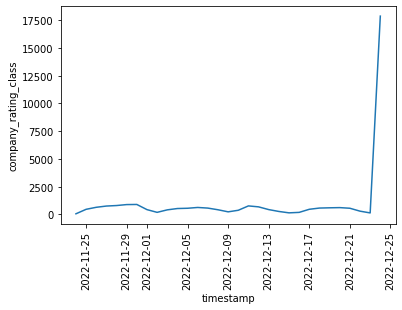

In [ ]:
sns.lineplot(x='timestamp', y='company_rating_class', data= ts_total)
plt.xticks(rotation=90)

In [ ]:
ts_total_per_rate=data[['timestamp','company_rating_class','job_post']].groupby(['timestamp','company_rating_class'] ).count().reset_index()


In [ ]:
ts_total_per_rate.sort_values(by='timestamp')

,timestamp,company_rating_class,job_post
0,2022-11-24,2,1
1,2022-11-24,3,26
2,2022-11-24,4,35
3,2022-11-25,2,11
4,2022-11-25,3,137
...,...,...,...
133,2022-12-24,3,6776
134,2022-12-24,4,9683
131,2022-12-24,1,121
132,2022-12-24,2,666


(array([738484., 738488., 738490., 738494., 738498., 738502., 738506.,
        738510., 738514.]), <a list of 9 Text major ticklabel objects>)

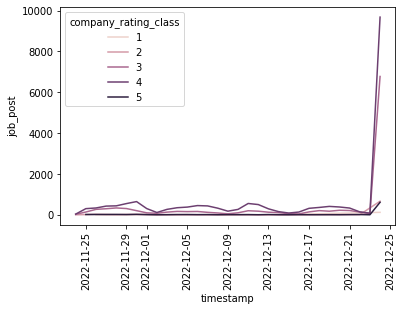

In [ ]:
sns.lineplot(x='timestamp', y='job_post', hue='company_rating_class', data= ts_total_per_rate)
plt.xticks(rotation=90)

8. Vamos a analizar los skills demandados en las ofertas de trabajo. Si nos fijamos en el dataframe, dentro de un mismo valor de skills, aparecen más de uno separados por '\n'. Por ello, se solicita que obtengáis una lista con todos los skills que aparecen en las distintas ofertas. En esta lista no se requiere mantener la referencia a la posición de trabajo en la que se encuentra.

In [ ]:
#Tema de los skills

skills=[]
for row in data['required_skills']:
  #print(row.split('\n'))
  skills=skills+row.split('\n')



- ¿Cuántas skills distintas encontramos? ¿Cuáles son las 30 skills más solicitadas? 

In [ ]:
len(skills)

249345

In [ ]:
len(np.unique(skills))

19869

In [ ]:
df_skills= pd.DataFrame()
df_skills['skills']=skills

In [ ]:
df_skills['skills'].value_counts()

IT Skills                             10879
Java                                   4506
Cloud                                  4048
Python                                 4019
Testing                                3594
                                      ...  
Multithreading And Synchronization        1
Oops Design Patterns                      1
bootstraps                                1
vuejs                                     1
SAP BEx                                   1
Name: skills, Length: 19869, dtype: int64

In [ ]:
df_skills_tp20=df_skills['skills'].value_counts().head(30).reset_index()
df_skills_tp20

,index,skills
0,IT Skills,10879
1,Java,4506
2,Cloud,4048
3,Python,4019
4,Testing,3594
5,Computer science,3017
6,Javascript,2528
7,Software Development,2516
8,Consulting,2405
9,Data analysis,2322


- Representa en un diagrama de barras las 30 skills más solicitadas con el número de ofertas en las que aparecen. 

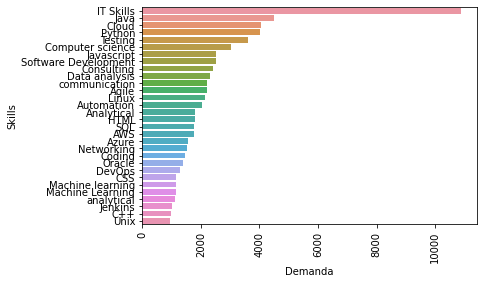

In [ ]:
sns.barplot(x='skills', y='index', data=df_skills_tp20)
plt.ylabel('Skills')
plt.xlabel('Demanda')
plt.xticks(rotation=90)
plt.show()

9. Crear un segundo dataframe (data2) que tenga en cuenta las instancias en las que en la columna 'exp_required' contenga el valor de años deexperiencia (Es decir, que contenga la cadena 'Yrs'). 

In [ ]:
data2= data[data['exp_required'].apply(lambda x: 'Yrs' in str(x))]

In [ ]:
data2.shape

(32493, 12)

10. Para evaluar numericamente la variable 'exp_required', transformar esta variable de forma que contenga el valor medio del intervalo que aparezca. Quedarse con el valor entero. Por ejemplo si el valor es 0-3, la trasformación será 1.

In [ ]:
#Transformación columna 'exp_required' con la media de los años de experiencia del intervalo señalado
data2['exp_required']=data2['exp_required'].apply(lambda x: int(str(x).replace('Yrs','').split('-')[0]) + int((int(str(x).replace('Yrs','').split('-')[1])-int(str(x).replace('Yrs','').split('-')[0]))/2))



In [ ]:
data2.head()

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022,company_rating_class,timestamp
0,Information Technology Executive,Marriott,4.2,2907,1,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO,4,2022-11-29
1,Associate Director-Information Technology(SAP),Unacademy,3.4,544,10,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO,3,2022-11-27
2,Lead - Information Technology,EchoIndia,4.0,20,12,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO,4,2022-11-25
3,Information Technology - Project Manager,Tata International,4.1,287,6,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO,4,2022-11-26
4,Information Technology Trainee,Stefanini,3.8,75,4,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO,3,2022-11-28


11. ¿Cuantas ofertas de trabajo aparecen para cada valor de los años de experiencias? Representar el diagrama de frecuencias de numero de ofertas por cada valor de los años de experiencia.

In [ ]:
data2_gb=data2[['job_post','exp_required']].groupby('exp_required').count().reset_index()
data2_gb['exp_required']=data2_gb['exp_required'].astype(int)

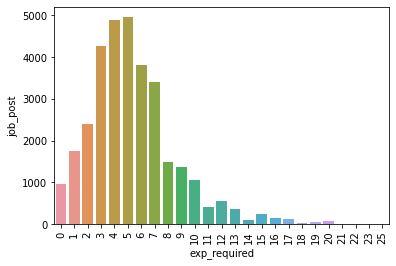

In [ ]:
sns.barplot(x='exp_required', y='job_post', data=data2_gb)
plt.xticks(rotation=90)
plt.show()

12. ¿Cuáles son las 20 compañias que ofrecen más post_positions? Mostrar un dataframe con el nombre de la compañia y el total de posiciones de trabajo totales para cada una de ellas. 

In [ ]:
# 20 compañias que ofrecen más post_positions
df_comp=data2[['company', 'job_post']].groupby('company').count().reset_index().sort_values(by='job_post', ascending=False).head(20)
df_comp

,company,job_post
173,Accenture,2391
2004,IBM,1406
2820,Microsoft,807
1181,DXC Technology,549
2209,Infostretch solutions Pvt. Ltd.,519
256,AgreeYa,463
3200,Optum,359
4740,Walmart,359
2525,L&T Infotech (LTI),331
3513,QuEST Global,299


In [ ]:
set(df_comp['company'])

{'Accenture',
 'AgreeYa',
 'Anicalls',
 'Cyient',
 'DXC Technology',
 'Dell Technologies',
 'Diverse Lynx',
 'Google',
 'HCL Technologies',
 'IBM',
 'IHS Markit',
 'Infostretch solutions Pvt. Ltd.',
 'L&T Infotech (LTI)',
 'Microsoft',
 'NTT DATA',
 'Nagarro',
 'Optum',
 'QuEST Global',
 'SAP',
 'Walmart'}

13. Añadir al dataframe anterior el número de dias distintos que estas compañias han publicado una oferta. Añadir otra columna que haga referencia al numero de ofertas/num dias distintos de publicación.


In [ ]:
# La media de positions por día y el ratio
df_comp_t= data2[['company', 'job_post', 'timestamp']].groupby(['company','timestamp']).count().reset_index().sort_values(by='job_post', ascending=False)
df_comp_t=df_comp_t[df_comp_t['company'].isin(set(df_comp['company']))]
df_comp_t



,company,timestamp,job_post
312,Accenture,2022-12-24,817
5196,Microsoft,2022-12-24,599
4132,Infostretch solutions Pvt. Ltd.,2022-12-24,501
2150,DXC Technology,2022-12-24,493
449,AgreeYa,2022-12-24,457
...,...,...,...
5470,NTT DATA,2022-12-05,1
5466,NTT DATA,2022-12-01,1
2134,DXC Technology,2022-11-30,1
5512,Nagarro,2022-12-14,1


In [ ]:
df_comp_f=df_comp_t['company'].value_counts().reset_index()
df_comp_f.rename(columns={'company':'freq','index':'company'}, inplace=True)

In [ ]:
df_comp_sumary= pd.merge(df_comp, df_comp_f, right_on='company', left_on='company', how='left')
df_comp_sumary['positions_per_day']=df_comp_sumary['job_post']/df_comp_sumary['freq']
df_comp_sumary

,company,job_post,freq,positions_per_day
0,Accenture,2391,29,82.448276
1,IBM,1406,28,50.214286
2,Microsoft,807,28,28.821429
3,DXC Technology,549,22,24.954545
4,Infostretch solutions Pvt. Ltd.,519,10,51.900000
5,AgreeYa,463,4,115.750000
6,Optum,359,19,18.894737
7,Walmart,359,23,15.608696
8,L&T Infotech (LTI),331,23,14.391304
9,QuEST Global,299,21,14.238095


14. Añadir al dataframe anterior otro campo que haga referencia al 'company_rating' de la compañia. 

In [ ]:
df_comp_sumary_rate=pd.merge(df_comp_sumary, data2[['company', 'company_rating']], how='left').drop_duplicates()
df_comp_sumary_rate

,company,job_post,freq,positions_per_day,company_rating
0,Accenture,2391,29,82.448276,4.1
2391,IBM,1406,28,50.214286,4.2
3797,Microsoft,807,28,28.821429,4.3
4604,DXC Technology,549,22,24.954545,3.8
5153,Infostretch solutions Pvt. Ltd.,519,10,51.900000,3.6
5672,AgreeYa,463,4,115.750000,3.4
6135,Optum,359,19,18.894737,4.1
6494,Walmart,359,23,15.608696,4.2
6853,L&T Infotech (LTI),331,23,14.391304,3.9
7184,QuEST Global,299,21,14.238095,3.6


15. A partir del dataset creado, representar en un gráfico de dos ejes: (1) En un diagrama de barras, el número de ofertas;  (2) En forma de línea el ratio que le corresponde a cada compañia. En el eje X, se verán las 20 compañias.

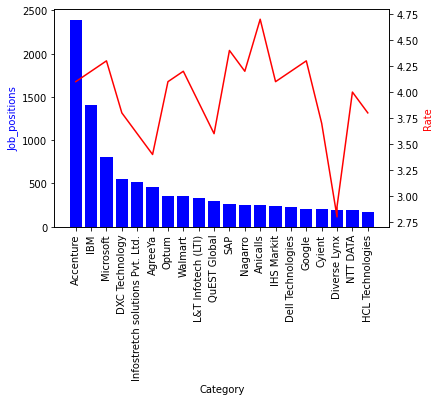

In [ ]:
fig, axes = plt.subplots()
axes.bar(df_comp_sumary_rate['company'].to_list(), df_comp_sumary_rate['job_post'].to_list(), color='b')
axes.set_xlabel('Category')
plt.xticks(rotation=90)
axes.set_ylabel('Job_positions', color='b')
twin_axes = axes.twinx() 
twin_axes.plot(df_comp_sumary_rate['company'].to_list(), df_comp_sumary_rate['company_rating'].to_list(), 'r')
twin_axes.set_ylabel('Rate', color='r')
plt.xticks(rotation=90)
plt.show()

16. ¿Cuantas compañias tienen publicadas ofertas de trabajo en más de 20 sitios distintos? ¿Cuáles?

In [ ]:
df_comp_loc=data2[['company','job_location']].drop_duplicates()
df_comp_loc

,company,job_location
0,Marriott,Bhopal
1,Unacademy,"Noida, Greater Noida"
2,EchoIndia,Delhi / NCR
3,Tata International,Mumbai (All Areas)
4,Stefanini,Noida
...,...,...
32714,Tentacle solutions,Remote
32718,Muthoot Finance,Hyderabad/Secunderabad
32721,RENAULT NISSAN TECHNOLOGY BUSINESS CENTRE INDI...,Chennai
32733,Birlasoft,Bangalore/Bengaluru


In [ ]:
df_comp_loc['company'].value_counts().reset_index()

,index,company
0,Bajaj Finserv,98
1,HCL Technologies,52
2,Genpact,32
3,Wipro,31
4,DXC Technology,25
...,...,...
5118,CloudFronts Technologies LLP,1
5119,Codiant Software Technologies Pvt. Ltd.,1
5120,Enterprise Bot,1
5121,Ascendency Infosystems,1


In [ ]:
#¿Cuantas compañias tienen publicadas ofertas de trabajo en más de 20 sitios distintos? ¿Cuáles?

df_comp_loc_filt=df_comp_loc['company'].value_counts().reset_index()

df_comp_loc_filt[df_comp_loc_filt['company']>20]

,index,company
0,Bajaj Finserv,98
1,HCL Technologies,52
2,Genpact,32
3,Wipro,31
4,DXC Technology,25
5,Accenture,25
6,Coforge,24
7,IBM,23
8,Xoriant,23
9,Oracle,21


In [ ]:
data2['company_review']=data2['company_review'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


17. Dibuja el histograma d ela variable 'company_rating'. ¿Qué tipo de distribución adviertes visualmente? 

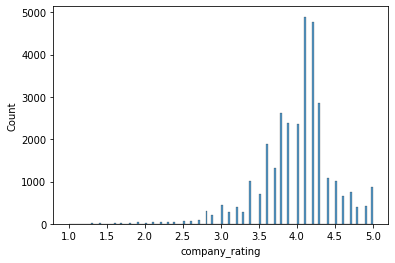

In [ ]:
sns.histplot(x='company_rating' , data=data2 )

18. Transformar la variable 'salary_offered' para poder hacer calculos y utilizarla como variable numérica. Para ello:
- Considerar solamente aquellos valores que ofrezcan un rango de salario. Nos quedaremos con el límite inferior. Es decir, si el valor es 20000-40000, nos quedaremos con 20000.
- Elimina las ',' para que pueda ser interpretado el valor correctamente. 



In [ ]:
data2['salary_offered']=data2['salary_offered'].apply(lambda x: (str(x).split('-')[0]).replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2['salary_offered']=data2['salary_offered'].apply(lambda x:  x if pd.isnull(x) else re.sub('[^0-9 ^\, ^-]', '', str(x))).apply(lambda x: x.strip()).apply(lambda x: x.replace(' ','nan'))

data3=data2[data2['salary_offered']!='']

19. A partir de la transformación de la variable del salario, crear un tercer dataframe (data3) que contenga solamente datos válidos de 'salary_offered'. Es decir, excluir aquellos registros cuyo salary_offered valga '' o similares. Asegurarse de que el tipo de esta variable es float. Representar el histograma de esta variable en el data3. 

In [ ]:
data3['salary_offered']=data3['salary_offered'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


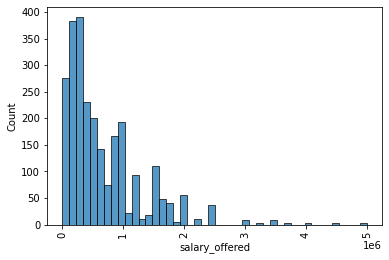

In [ ]:
sns.histplot(x='salary_offered', data=data3)
plt.xticks(rotation=90)
plt.show()

### **Parte B. Planteamiento del problema y del modelo**

El objetivo que se quiere conseguir con el modelo es, a partir de las variables ['company_rating','exp_required', 'days_ago'] del dataset, ser capaces de predecir el rango mímino del salario ['salary_offered'] si consiguiera el trabajo. 

1.	¿Qué problema queremos resolver, de clasificación o de regresión? Justifícalo.

_Respuesta:_

_TODO_

2.	A continuación, se facilitan dos códigos para entrenar un posible modelo. Completa los #TODO y ejecuta el que corresponda según tu respuesta a la pregunta anterior de si es un problema de regresión o de clasificación.  

NOTA: como la fase de obtención de modelos está fuera del contenido de esta asignatura y en este ejercicio vamos a abordar el modelado de una forma muy sencilla y sin fijarnos en las métricas de bondad de ajuste, no llevaremos a cabo los procesos de training y test propios de un proceso de modelado

In [ ]:
# CÓDIGO MODELO REGRESIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
# definir entrada-salida
X=data_3[['edad','sexo']].values
y=data_3[['medio_cat']].values

# Definir el tipo de modelo
model_r = LinearRegression()
# Ajustar el modelo a todo dataset
model_r.fit(X, y)


In [ ]:
# CÓDIGO MODELO CLASIFICACIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# definir entrada-salida
X=data_3[['edad','sexo']].values
y=data_3[['medio']].values

# Definir el tipo de modelo
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',  random_state=0)
# Ajustar el modelo a todo dataset
model.fit(X, y)


Estos tipos de modelo, directamente no aceptan tipos de dato _datatime_. Por ello, la variable timestamp la vamos a volver a converir en dias atras a partir de hoy(día en que se está realizando la PAC).De este modo, crearemos una variable/columna que se llame 'days_ago'.

In [ ]:
data_model=data3[['company_rating','exp_required', 'timestamp', 'salary_offered' ]]
data_model

,company_rating,exp_required,timestamp,salary_offered
15,4.0,1,2022-12-06,150000.0
33,3.8,0,2022-11-30,700000.0
44,3.9,2,2022-12-18,1000000.0
47,3.8,0,2022-11-30,700000.0
49,3.8,0,2022-11-30,700000.0
...,...,...,...,...
32567,4.3,6,2022-12-24,1100000.0
32627,4.2,3,2022-12-20,400000.0
32646,4.2,3,2022-12-20,400000.0
32721,3.7,4,2022-12-22,500000.0


In [ ]:
data3['days_ago']=data3['timestamp'].apply(lambda x: (x-datetime.date.today()).days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Después de la transformación, ya puedes escoger el modelo correspondiente a tu elección y completar el código.

In [ ]:
# CÓDIGO MODELO REGRESIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
# definir entrada-salida
X=data3[['company_rating','exp_required', 'days_ago']].values
y=data3[['salary_offered']].values

# Definir el tipo de modelo
model_r = LinearRegression()
# Ajustar el modelo a todo dataset
model_r.fit(X, y)


LinearRegression()

3. Una vez ajustado el modelo, contestar a cuál es el salario mínimo al qeu está obtando una persona si ha aplicado a una posición que salió hace 4 días ('days_ago') a una empresa qeu tiene un 'company_rating' =4 y los años de experiencia son 3?

In [ ]:
yhat = model_r.predict(np.array([4, 3, 4]).reshape(1, -1))

#
print('Si consigue el trabajo, el salario mínimo será (€):  %s' % np.round(yhat[0][0],2))

Si consigue el trabajo, el salario mínimo será (€):  442697.64
